In [1]:
from typing import Tuple, List
from pathlib import Path

import numpy as np
import pandas as pd

from sfw_brood.inference.core import SnowfinchBroodPrediction
from sfw_brood.inference.util import assign_recording_periods
from sfw_brood.preprocessing import classes_to_1hot, map_class_to_group
from sfw_brood.simple_size_clf.inference import SimpleSizeInference, SimpleSizeInferenceValidator
from sfw_brood.simple_size_clf.model import SimpleClfLoader

In [2]:
model = SimpleClfLoader().load_model('../_out/BS__2023-10-25T19-36-25/model.zip')
clf = SimpleSizeInference(model)
feeding_stats_path = 'D:/MINI/magisterka/Snowfinch/data/feeding-stats.csv'
age_pred_path = 'D:/MINI/magisterka/Snowfinch/data/brood-age.csv'
brood_info_path = 'D:/MINI/magisterka/Snowfinch/data/snowfinch-broods.csv'
preds = clf.predict(
	feeding_stats_path, age_pred_path,
	period_hours = 48, overlap_hours = 0
)

C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\simple_size_clf\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df[model.name] = model.predict(feeding_data[self.x_features], voting = self.voting)
C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\simple_size_clf\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df[model.name] = model.predict(feeding_data[self.x_features], voting = self.voting)
C:\Users\barto\Devel\Rep

C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\simple_size_clf\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df[model.name] = model.predict(feeding_data[self.x_features], voting = self.voting)
C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\simple_size_clf\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df[model.name] = model.predict(feeding_data[self.x_features], voting = self.voting)
C:\Users\barto\Devel\Rep

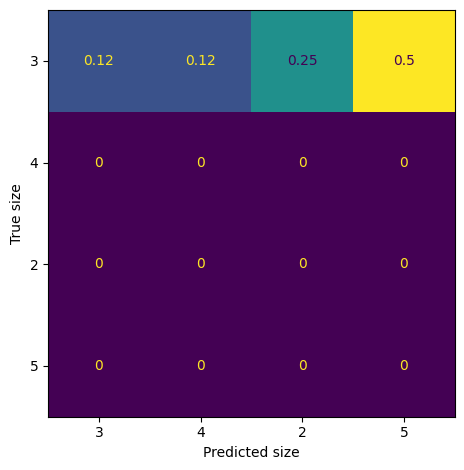

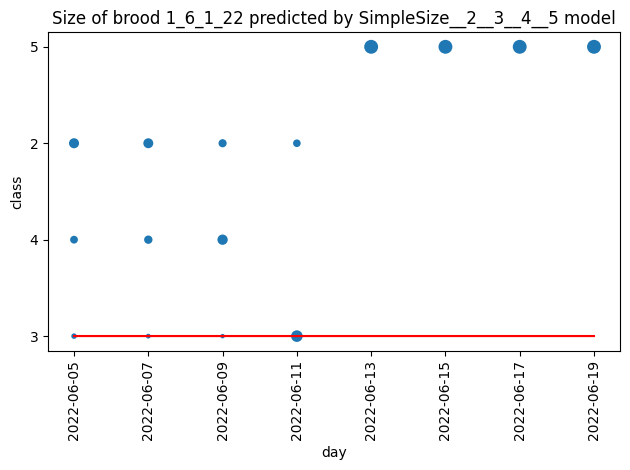

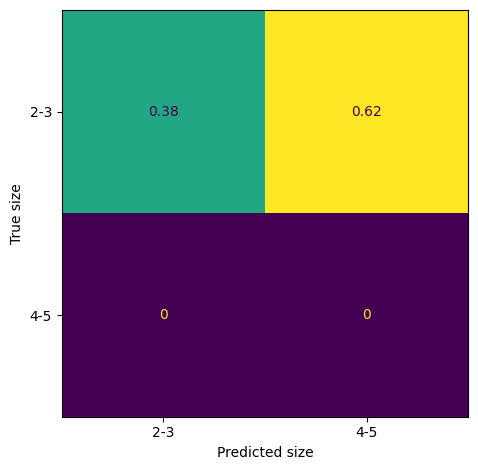

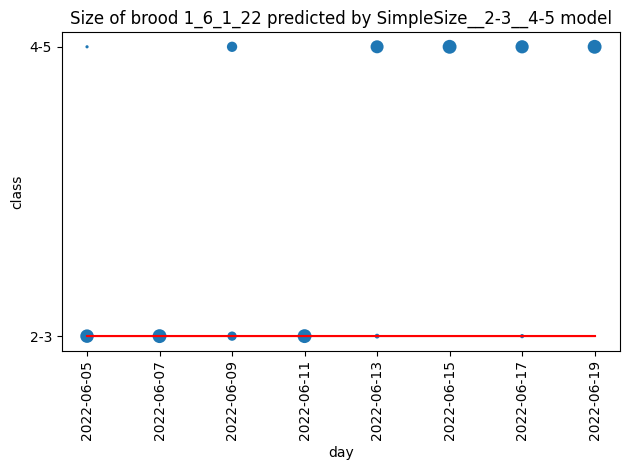

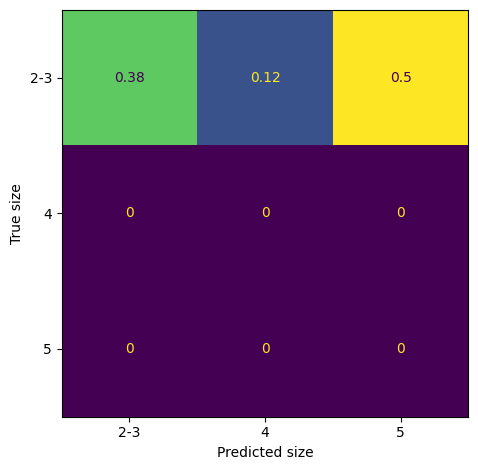

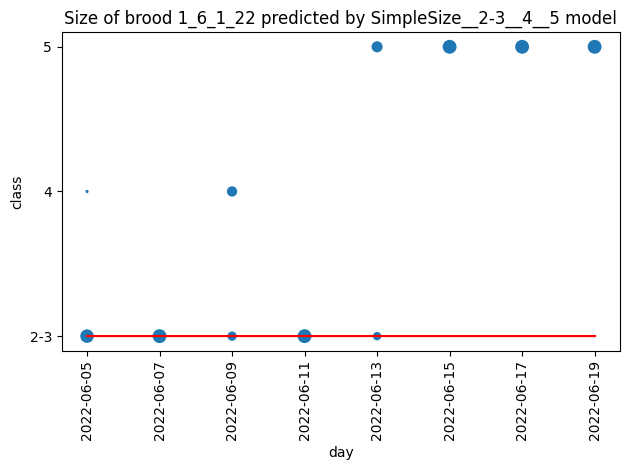

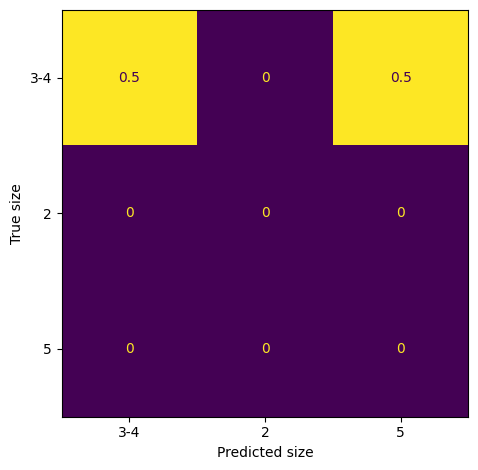

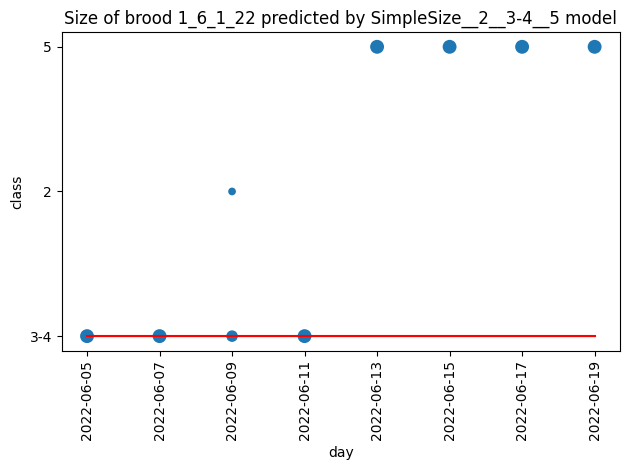

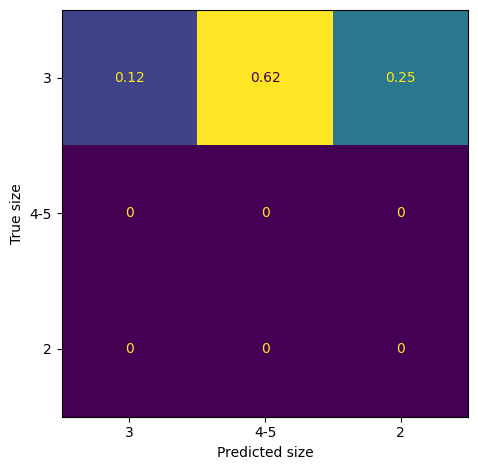

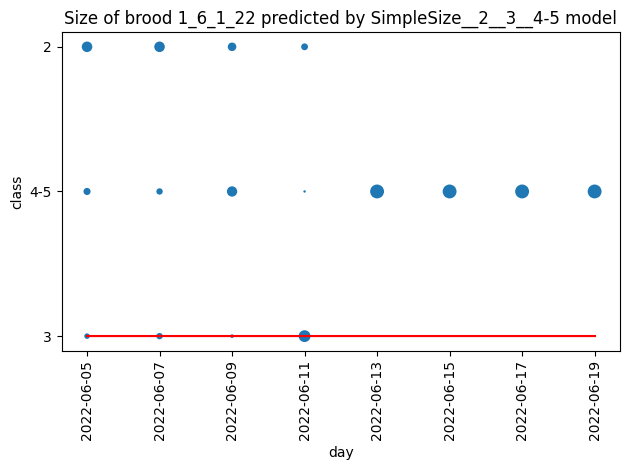

In [5]:
validator = SimpleSizeInferenceValidator(period_hours = 48, overlap_hours = 0)
validator.validate_inference(
	clf, feeding_stats_path, age_pred_path, brood_info_path,
	out_path = Path('../_out/simple-clf-validation'),
	data_root = Path('D:\MINI\magisterka\Snowfinch\data')
)

In [3]:
test_data = pd.read_csv('D:/MINI/magisterka/Snowfinch/data/snowfinch-broods.csv')
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data

,brood_id,datetime,age_min,age_max,brood_size
0,10_1_1_22,2022-06-14 16:15:00,0.5,1.0,3.0
1,10_1_1_22,2022-06-15 13:30:00,1.5,2.0,3.0
2,10_1_1_22,2022-06-16 11:53:00,2.5,3.0,3.0
3,10_1_1_22,2022-06-17 11:15:00,3.5,4.0,3.0
4,10_1_1_22,2022-06-18 07:10:00,4.5,5.0,3.0
...,...,...,...,...,...
300,Joch4_22a,2022-06-20 12:00:00,12.0,13.0,4.0
301,Joch4_22a,2022-06-21 12:00:00,13.0,14.0,4.0
302,Joch4_22a,2022-06-22 12:00:00,14.0,15.0,4.0
303,Joch4_22a,2022-06-23 12:00:00,15.0,16.0,4.0


In [4]:
test_data, period_map = assign_recording_periods(
	test_data, period_hours = 48, overlap_hours = 0
)
print(period_map)
test_data

{'10_1_1_22': [datetime.datetime(2022, 6, 14, 0, 0)], '12_1_1_22': [datetime.datetime(2022, 6, 21, 0, 0)], '13_1_1_22': [datetime.datetime(2022, 6, 19, 0, 0)], '1_2_1_22': [datetime.datetime(2022, 6, 2, 0, 0)], '1_3_1_22': [datetime.datetime(2022, 6, 10, 0, 0)], '1_6_1_22': [datetime.datetime(2022, 6, 3, 0, 0)], '1_8_1_22': [datetime.datetime(2022, 6, 2, 0, 0)], '2_2_1_22': [datetime.datetime(2022, 6, 2, 0, 0)], '4_4_1_22': [datetime.datetime(2022, 6, 5, 0, 0)], '7_1_1_22': [datetime.datetime(2022, 6, 7, 0, 0)], '8_5_1_22': [datetime.datetime(2022, 6, 3, 0, 0)], 'Furka10_22a': [datetime.datetime(2022, 5, 31, 0, 0)], 'Furka12_22a': [datetime.datetime(2022, 7, 12, 0, 0)], 'Furka13_22a': [datetime.datetime(2022, 5, 31, 0, 0)], 'Furka14_22a': [datetime.datetime(2022, 5, 31, 0, 0)], 'Furka31_22a': [datetime.datetime(2022, 7, 16, 0, 0)], 'Furka33_22a': [datetime.datetime(2022, 7, 7, 0, 0)], 'Furka34_22a': [datetime.datetime(2022, 6, 5, 0, 0)], 'Joch4_22a': [datetime.datetime(2022, 6, 10, 0, 

,brood_id,datetime,age_min,age_max,brood_size,period_start
0,10_1_1_22,2022-06-14 16:15:00,0.5,1.0,3.0,2022-06-14
1,10_1_1_22,2022-06-15 13:30:00,1.5,2.0,3.0,2022-06-14
2,10_1_1_22,2022-06-16 11:53:00,2.5,3.0,3.0,2022-06-16
3,10_1_1_22,2022-06-17 11:15:00,3.5,4.0,3.0,2022-06-16
4,10_1_1_22,2022-06-18 07:10:00,4.5,5.0,3.0,2022-06-18
...,...,...,...,...,...,...
300,Joch4_22a,2022-06-20 12:00:00,12.0,13.0,4.0,2022-06-20
301,Joch4_22a,2022-06-21 12:00:00,13.0,14.0,4.0,2022-06-20
302,Joch4_22a,2022-06-22 12:00:00,14.0,15.0,4.0,2022-06-22
303,Joch4_22a,2022-06-23 12:00:00,15.0,16.0,4.0,2022-06-22


In [5]:
preds = clf.predict(
	'D:/MINI/magisterka/Snowfinch/data/feeding-stats.csv',
	'D:/MINI/magisterka/Snowfinch/data/brood-age.csv',
	period_hours = 48, overlap_hours = 0
)

C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\simple_size_clf\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df[model.name] = model.predict(feeding_data[self.x_features], voting = self.voting)
C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\simple_size_clf\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df[model.name] = model.predict(feeding_data[self.x_features], voting = self.voting)
C:\Users\barto\Devel\Rep

In [21]:
def classes_to_groups(classes: list[str]) -> List[Tuple[float, float]]:
	groups = []
	for cls in classes:
		bounds = cls.split('-')
		if len(bounds) == 1:
			groups.append((int(bounds[0]), int(bounds[0])))
		else:
			groups.append((int(bounds[0]), int(bounds[1])))
	return groups


def find_true_size(brood, dt, true_df):
	time_delta = abs(true_df['datetime'] - dt)
	time_delta[true_df['brood_id'] != brood] = np.NaN
	return true_df.iloc[time_delta.argmin()][['brood_size', 'period_start']]


def aggregate_test_data(test_df: pd.DataFrame, pred: SnowfinchBroodPrediction) -> Tuple[pd.DataFrame, pd.DataFrame]:
	size_test_df = pred.sample_results[['brood_id', 'datetime']]
	size_test_df[['size', 'period_start']] = size_test_df.apply(
		lambda row: find_true_size(row['brood_id'], row['datetime'], test_df),
		axis = 'columns', result_type = 'expand'
	)

	size_groups = classes_to_groups(pred.classes)

	def map_size(size: float) -> str:
		return map_class_to_group(size, size_groups, group_labels = pred.classes)

	size_test_df['class'] = size_test_df['size'].apply(map_size)
	size_test_df = classes_to_1hot(size_test_df)
	for cls in pred.classes:
		if cls not in size_test_df.columns:
			size_test_df[cls] = 0

	agg_map = { 'datetime': 'count' }
	for bs in pred.classes:
		agg_map[bs] = 'sum'

	agg_cols = ['brood_id', 'period_start'] + list(agg_map.keys())
	size_test_agg = size_test_df[agg_cols].groupby(['brood_id', 'period_start']).agg(agg_map)
	idx = pred.brood_periods_results.set_index(['brood_id', 'period_start']).index
	size_test_agg = size_test_agg.loc[idx].reset_index()
	size_test_agg = size_test_agg.rename(columns = { 'datetime': 'sample_count' })

	return size_test_df, size_test_agg

In [22]:
test_df_0, test_agg_0 = aggregate_test_data(test_data, preds[0])
test_df_1, test_agg_1 = aggregate_test_data(test_data, preds[1])

C:\Users\barto\AppData\Local\Temp\ipykernel_3880\2991268767.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_test_df[['size', 'period_start']] = size_test_df.apply(
C:\Users\barto\AppData\Local\Temp\ipykernel_3880\2991268767.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_test_df[['size', 'period_start']] = size_test_df.apply(
C:\Users\barto\AppData\Local\Temp\ipykernel_3880\2991268767.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [23]:
test_df_0

,brood_id,datetime,size,period_start,class,3,4,2,5
0,1_6_1_22,2022-06-10 07:00:00,3.0,2022-06-09,3,1.0,0,0,0
1,1_6_1_22,2022-06-17 19:00:00,3.0,2022-06-17,3,1.0,0,0,0
2,1_6_1_22,2022-06-19 18:00:00,3.0,2022-06-19,3,1.0,0,0,0
3,1_6_1_22,2022-06-19 10:00:00,3.0,2022-06-19,3,1.0,0,0,0
4,1_6_1_22,2022-06-19 09:00:00,3.0,2022-06-19,3,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...
214,1_6_1_22,2022-06-08 15:00:00,3.0,2022-06-07,3,1.0,0,0,0
215,1_6_1_22,2022-06-08 20:00:00,3.0,2022-06-07,3,1.0,0,0,0
216,1_6_1_22,2022-06-07 04:00:00,3.0,2022-06-05,3,1.0,0,0,0
217,1_6_1_22,2022-06-12 20:00:00,3.0,2022-06-11,3,1.0,0,0,0


In [24]:
test_agg_0

,brood_id,period_start,sample_count,3,4,2,5
0,1_6_1_22,2022-06-05,32,32.0,0,0,0
1,1_6_1_22,2022-06-07,32,32.0,0,0,0
2,1_6_1_22,2022-06-09,17,17.0,0,0,0
3,1_6_1_22,2022-06-11,33,33.0,0,0,0
4,1_6_1_22,2022-06-13,33,33.0,0,0,0
5,1_6_1_22,2022-06-15,32,32.0,0,0,0
6,1_6_1_22,2022-06-17,31,31.0,0,0,0
7,1_6_1_22,2022-06-19,9,9.0,0,0,0


In [25]:
test_df_1

,brood_id,datetime,size,period_start,class,2-3,4-5
0,1_6_1_22,2022-06-05 17:00:01,3.0,2022-06-05,2-3,1.0,0
1,1_6_1_22,2022-06-18 18:00:00,3.0,2022-06-17,2-3,1.0,0
2,1_6_1_22,2022-06-18 17:00:00,3.0,2022-06-17,2-3,1.0,0
3,1_6_1_22,2022-06-06 04:00:00,3.0,2022-06-05,2-3,1.0,0
4,1_6_1_22,2022-06-18 13:00:00,3.0,2022-06-17,2-3,1.0,0
...,...,...,...,...,...,...,...
214,1_6_1_22,2022-06-06 12:00:00,3.0,2022-06-05,2-3,1.0,0
215,1_6_1_22,2022-06-06 11:00:00,3.0,2022-06-05,2-3,1.0,0
216,1_6_1_22,2022-06-06 10:00:00,3.0,2022-06-05,2-3,1.0,0
217,1_6_1_22,2022-06-07 19:00:00,3.0,2022-06-07,2-3,1.0,0


In [26]:
test_agg_1

,brood_id,period_start,sample_count,2-3,4-5
0,1_6_1_22,2022-06-05,32,32.0,0
1,1_6_1_22,2022-06-07,32,32.0,0
2,1_6_1_22,2022-06-09,17,17.0,0
3,1_6_1_22,2022-06-11,33,33.0,0
4,1_6_1_22,2022-06-13,33,33.0,0
5,1_6_1_22,2022-06-15,32,32.0,0
6,1_6_1_22,2022-06-17,31,31.0,0
7,1_6_1_22,2022-06-19,9,9.0,0


In [27]:
preds[0].brood_periods_results

,brood_id,period_start,2_n_samples,3_n_samples,4_n_samples,5_n_samples,n_samples,3,4,2,5,class
0,1_6_1_22,2022-06-05,10.0,3.0,6.0,0.0,19,0,0,1,0,2
1,1_6_1_22,2022-06-07,17.0,4.0,12.0,0.0,33,0,0,1,0,2
2,1_6_1_22,2022-06-09,10.0,3.0,16.0,0.0,29,0,1,0,0,4
3,1_6_1_22,2022-06-11,10.0,23.0,0.0,0.0,33,1,0,0,0,3
4,1_6_1_22,2022-06-13,0.0,0.0,0.0,33.0,33,0,0,0,1,5
5,1_6_1_22,2022-06-15,0.0,0.0,0.0,32.0,32,0,0,0,1,5
6,1_6_1_22,2022-06-17,0.0,0.0,0.0,32.0,32,0,0,0,1,5
7,1_6_1_22,2022-06-19,0.0,0.0,0.0,8.0,8,0,0,0,1,5
